# **Overview**

COVID-19 outcome prediction is the use of machine learning to predict the severity of a patient's illness and their chances of survival. 
This information can be used to help doctors make decisions about treatment and care.

There are a number of factors that can be used to predict the outcome of COVID-19, including:

The patient's age and underlying health conditions
The severity of their symptoms
The results of laboratory tests
The patient's response to treatment

#  COVID-19 Outcome Prediction

In [ ]:
# starting the code with importing the required libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, confusion_matrix, recall_score, precision_recall_curve, PrecisionRecallDisplay, f1_score, classification_report
from sklearn import datasets, metrics, model_selection,svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# reading 'CSV' file  that called "data.csv" 
data=pd.read_csv('C:/Users/Lap-5/Desktop/AI Project/data.csv',index_col=0) 

In [ ]:
# the data contain set of features and one label
#the features are (Country,Location,Age,Gender,Visited_Wuhan,From_Wuhan,Symptoms,Time_before_symptoms_appear)
# the only label is Result
#showing the data 
data

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [ ]:
# Verify whether any feature has a null value by using  insa().any()
data.isna().any()

location        False
country         False
gender          False
age             False
vis_wuhan       False
from_wuhan      False
symptom1        False
symptom2        False
symptom3        False
symptom4        False
symptom5        False
symptom6        False
diff_sym_hos    False
result          False
dtype: bool

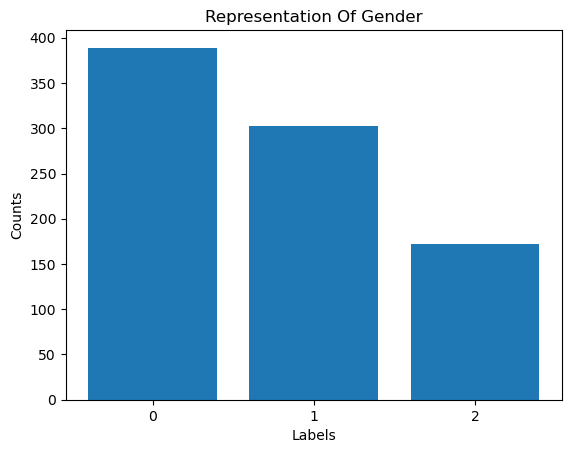

In [ ]:
# the gender contain three values (0,1,2)
# using Matplotlib to draw the count of 0,1 and 2
plt.bar(["0", "1", "2"], data["gender"].value_counts())
plt.title("Representation Of Gender")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

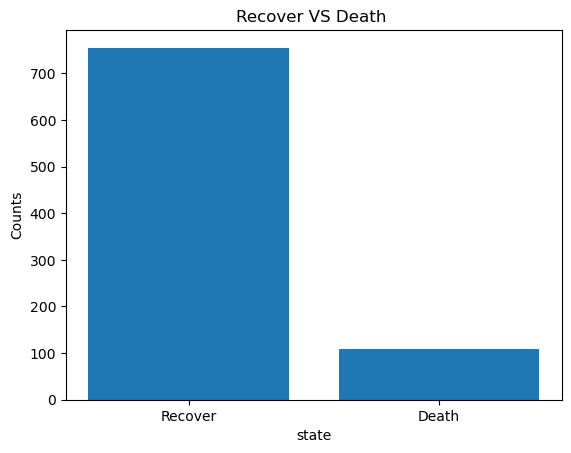

In [ ]:
# the target contain two values (0,1)
# using Matplotlib to draw the count of 0,1
# 0=>represent the people who recovered
# 1=>represent the people who dead
plt.bar(["Recover", "Death"], data["result"].value_counts())
plt.title("Recover VS Death ")
plt.xlabel("state")
plt.ylabel("Counts")
plt.show()

In [ ]:
# split the data into two parts:
# the first part is : features
# the second parts is :label(target)
features = ['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
x = data.loc[:, features]
y = data.loc[:, ['result']]

In [ ]:
# show the features 
x

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0


In [ ]:
# show the target 
y

,result
0,1
1,0
2,0
3,0
4,0
...,...
858,1
859,0
860,0
861,0


### get the relationship between each feature and label

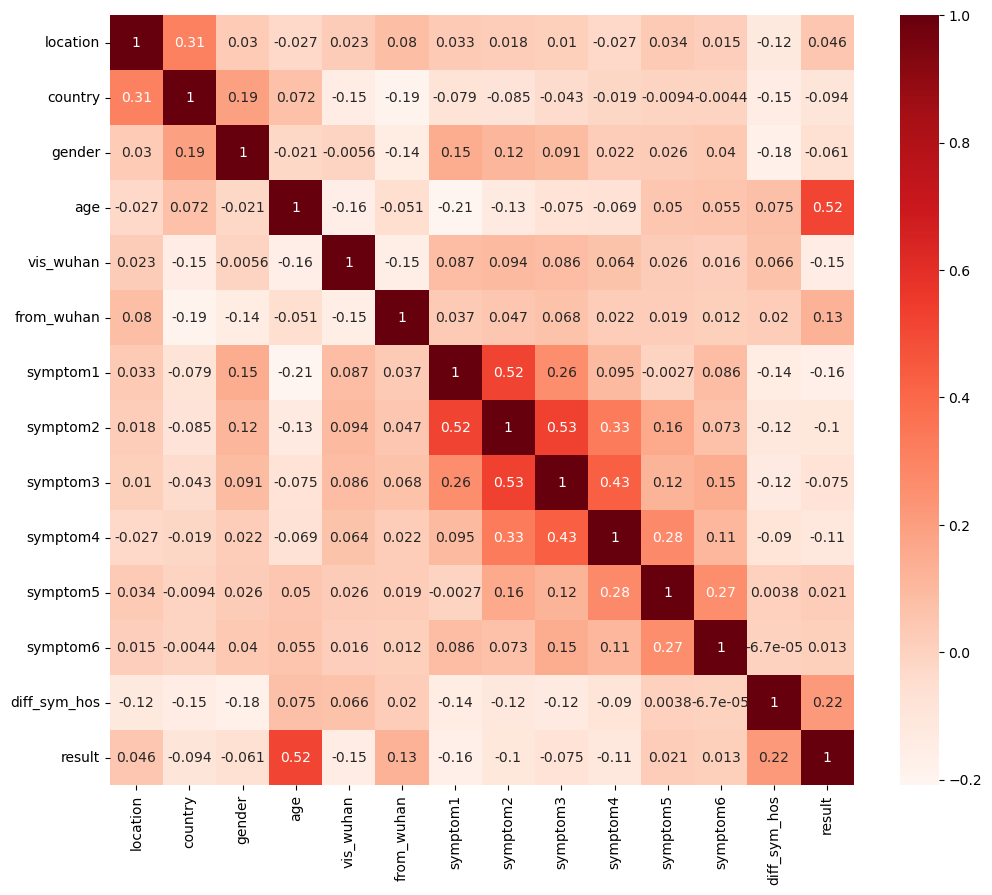

In [ ]:
# Using heatmap to get the relation between each feature and label
# also heatmap use to show the relation between features
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# show the numerical correlation between each feature and label based on result of heatmap
cor['result']

location        0.046240
country        -0.094443
gender         -0.061441
age             0.515127
vis_wuhan      -0.151122
from_wuhan      0.128314
symptom1       -0.163039
symptom2       -0.103270
symptom3       -0.074982
symptom4       -0.108723
symptom5        0.020676
symptom6        0.012882
diff_sym_hos    0.219116
result          1.000000
Name: result, dtype: float64

## description from result
### Based on the values of the heatmap, the value between each feature and label are on a small scale, hence I won't be making any features selection.<br><br><br><br>















In [ ]:
# split the data into train and test 
# the percentage of train data is 80%
# the percentage of test data is 20%
# the random state is:54321
# can use stratify argument to retain the same proportion of classes(0,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=54321,stratify=y)

In [ ]:
# show the shape (number of rows , number of features) of x_train data 
x_train.shape

(690, 13)

In [ ]:
# show the shape (number of rows , number of features) of x_test data 
x_test.shape

(173, 13)

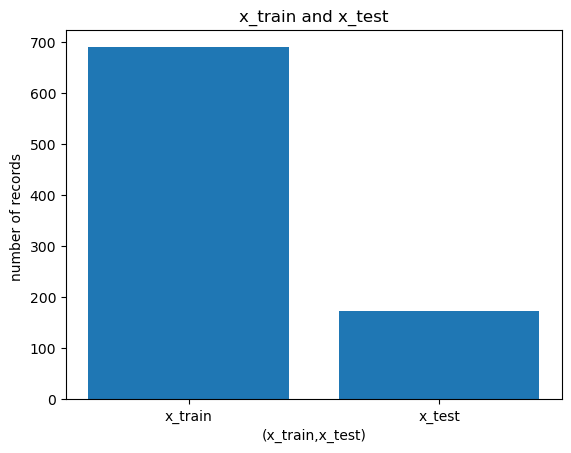

In [ ]:
# represent the number of records of (x_train,x_test)
plt.bar(["x_train","x_test"],[len(x_train),len(x_test)])
plt.title("x_train and x_test")
plt.xlabel("(x_train,x_test)")
plt.ylabel("number of records ")
plt.show()

#  KNN Algorithm

In [ ]:
# building of grid search  to find the optimal hyperparameters of KNN model
# the hyperparameters that will pass of grid search are (the model,number of neighbors,number of k-folds,weights,n_jobs,verbose)
# KNN is non_parametric that mean no parameter such as learning rate
knn_model = KNeighborsClassifier()
k_neighbour = range(1, 31)
n_neighbors_paras = {
'weights': ['uniform', 'distance'],
'n_neighbors':k_neighbour}
# defining parameter range
grid = GridSearchCV(knn_model, n_neighbors_paras, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# get the best value of hyperparameters using (best_params_)
print(grid.best_params_)

{'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
#the best value of accuracy on train data 
grid.best_score_

0.9391304347826088

In [ ]:
#get the estimator with best parameter
grid_s=grid.best_estimator_

In [ ]:
"""
1- train the KNN Model using (x_train, y_train)
2- make prediction on x_test data
3- get test accuracy based on the prediction of x_test data y_test
4- store the value of test accuracy in variable called test_accuracy_KNN
"""
#knn_model = KNeighborsClassifier(n_neighbors=3,metric='manhattan',n_jobs=-1)
grid_s.fit(x_train, y_train)
y_test_hat=grid_s.predict(x_test) 
test_accuracy_KNN=accuracy_score(y_test,y_test_hat)

In [ ]:
# computing the metrics of KNN model(precision,recall,f1-score,ROC/AUC)
knn_precision=precision_score(y_test,y_test_hat)
knn_recall=recall_score(y_test,y_test_hat)
knn_score=f1_score(y_test,y_test_hat)

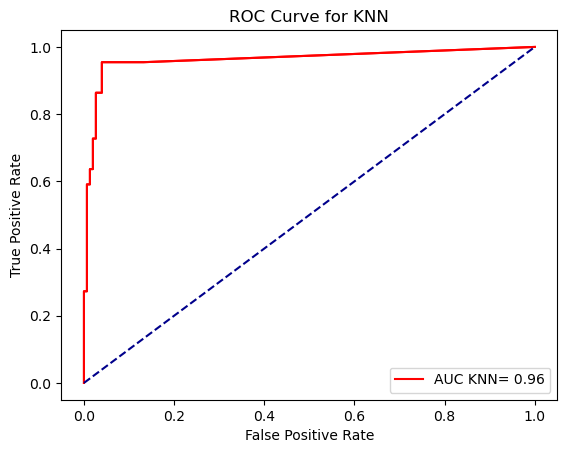

In [ ]:
#acuraccy scores
#Calculating Area Under the Curve with predict probapility:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, grid_s.predict_proba(x_test)[:,1])
roc_auc_1 = roc_auc_score(y_test, grid_s.predict_proba(x_test)[:,1])
plt.plot(fpr_1, tpr_1, 'r', label = 'AUC KNN= %0.2f' % roc_auc_1)
plt.plot(fpr_1, tpr_1, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc = 'lower right')

In [ ]:
# get the values of metrics (precision,recall,f1-score, ROC/AUC)
print("the value of precision is",knn_precision)
print("the value of recall is",knn_recall)
print("the value of f1_score is",knn_score)
print("the value of ROC/AUC is",roc_auc_1)

the value of precision is 0.8181818181818182
the value of recall is 0.8181818181818182
the value of f1_score is 0.8181818181818182
the value of ROC/AUC is 0.9625225767609874


In [ ]:
# get the test accuracy  
knn_accuracy= accuracy_score(y_test,y_test_hat)
print("the value of accuracy is",knn_accuracy)

the value of accuracy is 0.953757225433526


In [ ]:
"""
using classification report to show the value of 
(precision,recall,f1-score) of class 0 and class 1
and show the  test accuracy
"""
ClassificationReport6 = classification_report(y_test, y_test_hat)
print('Classification Report is : \n', ClassificationReport6)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       151
           1       0.82      0.82      0.82        22

    accuracy                           0.95       173
   macro avg       0.90      0.90      0.90       173
weighted avg       0.95      0.95      0.95       173



### we will choose the best model based on the value of recall on class 0 and class 1  beacuse recall will be important in medical field

In [ ]:
# catch the values of recall of class 0 and class 1
ClassificationReport6= classification_report(y_test, y_test_hat, output_dict=True)
recall_knn = pd.DataFrame(ClassificationReport6).transpose()
knn_recall_class0=recall_knn["recall"][:1,]
knn_recall_class1=recall_knn["recall"][1:2,]

In [ ]:
# catch the values of f-score of class 0 and class 1
ClassificationReport66= classification_report(y_test, y_test_hat, output_dict=True)
f1_score_knn = pd.DataFrame(ClassificationReport66).transpose()
knn_f1_score_class0=f1_score_knn["f1-score"][0:1,]
knn_f1_score_class1=f1_score_knn["f1-score"][1:2,]

In [ ]:
# the value of recall in class 0
knn_recall_class0

0    0.97351
Name: recall, dtype: float64

In [ ]:
# the value of recall in class 1
knn_recall_class1

1    0.818182
Name: recall, dtype: float64

In [ ]:
#compute Confusion Matrix on test data
confusion= confusion_matrix(y_test,y_test_hat)

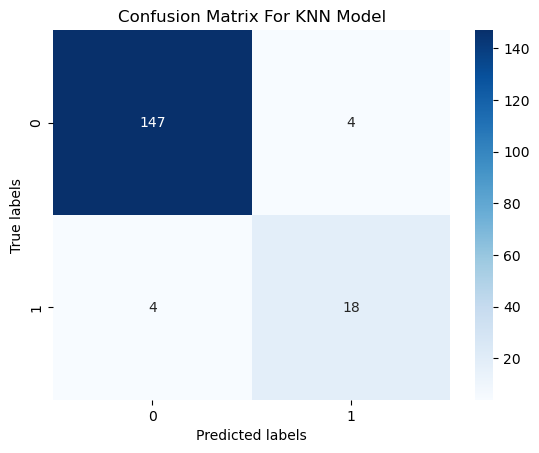

In [ ]:
# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax = ax,cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For KNN Model');

# 

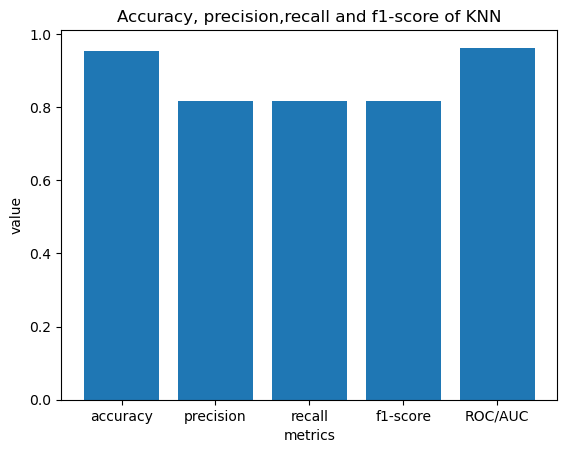

In [ ]:
# plotting the result of Accuracy, precision,recall and f1-score and ROC/AUC on test data 
plt.bar(["accuracy","precision","recall","f1-score","ROC/AUC"],[knn_accuracy,knn_precision,knn_recall,knn_score,roc_auc_1])
plt.title("Accuracy, precision,recall and f1-score of KNN")
plt.xlabel("metrics")
plt.ylabel("value")
plt.show()

In [ ]:
# get the detail values of score
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003173,0.004141,0.002591,0.002161,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.942029,0.884058,0.971014,0.971014,0.884058,0.971014,0.898551,0.869565,0.956522,0.898551,0.924638,0.039318,41
1,0.001562,0.004686,0.001562,0.004686,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.942029,0.884058,0.971014,0.971014,0.884058,0.971014,0.898551,0.869565,0.956522,0.898551,0.924638,0.039318,41
2,0.003127,0.006255,0.002266,0.004921,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.956522,0.927536,0.956522,0.927536,0.913043,0.956522,0.913043,0.898551,0.942029,0.898551,0.928986,0.021932,36
3,0.003124,0.006249,0.001562,0.004687,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.942029,0.884058,0.971014,0.971014,0.884058,0.971014,0.898551,0.869565,0.956522,0.898551,0.924638,0.039318,41
4,0.002740,0.001827,0.002212,0.001176,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.956522,0.913043,0.956522,0.942029,0.942029,0.942029,0.927536,0.927536,0.927536,0.898551,0.933333,0.017391,20
5,0.003124,0.006249,0.000000,0.000000,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.956522,0.898551,0.971014,0.956522,0.942029,0.971014,0.927536,0.898551,0.942029,0.898551,0.936232,0.027650,5
6,0.004687,0.007159,0.000800,0.002401,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.942029,0.927536,0.956522,0.942029,0.898551,0.942029,0.942029,0.855072,0.927536,0.884058,0.921739,0.030538,50
7,0.003124,0.006249,0.001562,0.004686,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.942029,0.898551,0.971014,0.971014,0.927536,0.971014,0.927536,0.898551,0.942029,0.898551,0.934783,0.028437,15
8,0.003781,0.006235,0.001562,0.004686,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.956522,0.927536,0.956522,0.942029,0.927536,0.971014,0.942029,0.913043,0.913043,0.884058,0.933333,0.024424,21
9,0.001859,0.004667,0.003249,0.006256,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.956522,0.927536,0.956522,0.956522,0.927536,0.956522,0.927536,0.913043,0.942029,0.898551,0.936232,0.019659,5


###  logistic regression

In [ ]:
# building of grid search  to find the optimal hyperparameters of logistic regression model
# the hyperparameters that will pass of grid search are (the model,'C',solver,penalty,k-fold,verbose,max_iter)
grid= {'C' : np.logspace(-4, 4, 20), "penalty":["l1","l2"],'max_iter' : [100, 1000,2500, 5000],'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}
# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,refit = True, verbose = 1, cv=10, n_jobs= -1)
logreg_cv.fit(x_train,y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [ ]:
#get the best value of hyperparameters using best_params_
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 11.288378916846883, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#the best value of accuracy in train data 
print("accuracy :",logreg_cv.best_score_)

accuracy : 0.9449275362318842


In [ ]:
#the estimator with best parameter
logreg_s=logreg_cv.best_estimator_
logreg_s

LogisticRegression(C=11.288378916846883, max_iter=1000)

In [ ]:
"""
1- starting passing the best parameter of logistic regression Model
2- train the logistic regression Model using (x_train, y_train)
3- make prediction on x_test data
4- get test accuracy based on the prediction of x_test data y_test
5- store the value of test accuracy in variable called test_accuracy_KNN
"""
#logreg2=LogisticRegression(solver='newton-cg',C=1,penalty="l2")
logreg_s.fit(x_train,y_train)
y_test_predict=logreg_s.predict(x_test) 
test_accuracy_logistic=logreg_s.score(x_test,y_test)

In [ ]:
# computing the metrics of KNN model(precision,recall,f1-score,ROC/AUC)
logistic_precision=precision_score(y_test,y_test_predict)
logistic_recall=recall_score(y_test,y_test_predict)
logistic_score=f1_score(y_test,y_test_predict)

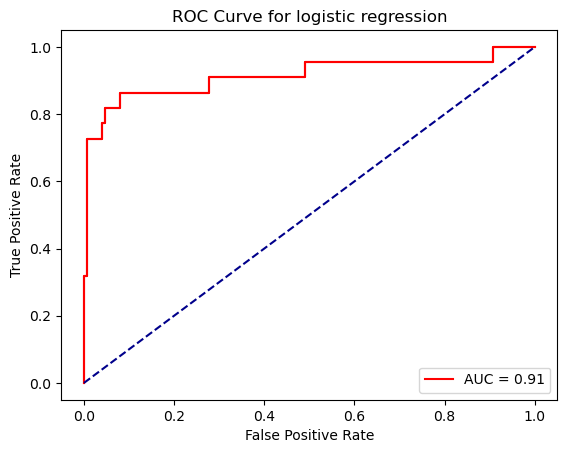

In [ ]:
#acuraccy scores
#Calculating Area Under the Curve with predict probapility:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, logreg_s.predict_proba(x_test)[:,1])
roc_auc_2 = roc_auc_score(y_test, logreg_s.predict_proba(x_test)[:,1])
plt.plot(fpr_2, tpr_2, 'r', label = 'AUC = %0.2f' % roc_auc_2)
plt.plot(fpr_2, tpr_2, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc = 'lower right')

In [ ]:
# get the values of metrics (precision,recall,f1-score, ROC/AUC)
print("the value of precision is",logistic_precision)
print("the value of recall is",logistic_recall)
print("the value of f1_score is",logistic_score)
print("the value of ROC/AUC is",roc_auc_2)

the value of precision is 0.7391304347826086
the value of recall is 0.7727272727272727
the value of f1_score is 0.7555555555555555
the value of ROC/AUC is 0.9136062612883804


In [ ]:
# get the test accuracy  
logistic_accuracy= accuracy_score(y_test,y_test_predict)
print("the value of accuracy is",logistic_accuracy)

the value of accuracy is 0.9364161849710982


In [ ]:
"""
using classification report to show the value of 
(precision,recall,f1-score) of class 0 and class 1
and show the  test accuracy
"""
ClassificationReport5 = classification_report(y_test, y_test_predict)
print('Classification Report is : \n', ClassificationReport5)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       151
           1       0.74      0.77      0.76        22

    accuracy                           0.94       173
   macro avg       0.85      0.87      0.86       173
weighted avg       0.94      0.94      0.94       173



In [ ]:
# catch the values of recall of class 0 and class 1
ClassificationReport5= classification_report(y_test, y_test_predict, output_dict=True)
recall_logistic = pd.DataFrame(ClassificationReport5).transpose()
logistic_recall_class0=recall_logistic["recall"][:1,]
logistic_recall_class1=recall_logistic["recall"][1:2,]

In [ ]:
# catch the values of f-score of class 0 and class 1
ClassificationReport55= classification_report(y_test, y_test_predict, output_dict=True)
f1_score_logistic = pd.DataFrame(ClassificationReport55).transpose()
logistic_f1_score_class0=f1_score_logistic["f1-score"][0:1,]
logistic_f1_score_class1=f1_score_logistic["f1-score"][1:2,]

In [ ]:
# the value of recall in class 0
logistic_recall_class0

0    0.960265
Name: recall, dtype: float64

In [ ]:
# the value of recall in class 1
logistic_recall_class1

1    0.772727
Name: recall, dtype: float64

In [ ]:
#compute Confusion Matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_test_predict)

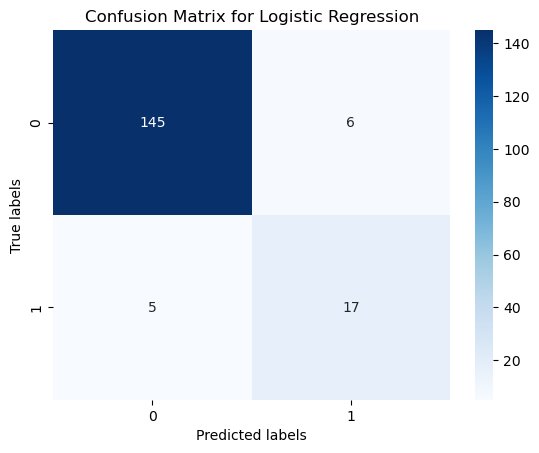

In [ ]:
# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax,cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression');

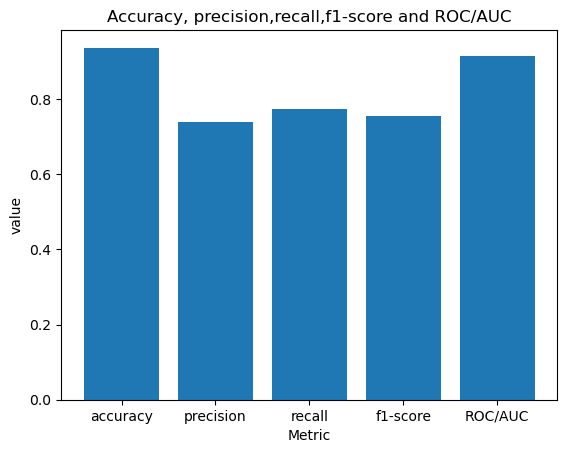

In [ ]:
# plotting the result
plt.bar(["accuracy","precision","recall","f1-score","ROC/AUC"],[logistic_accuracy,logistic_precision,logistic_recall,logistic_score,roc_auc_2])
plt.title("Accuracy, precision,recall,f1-score and ROC/AUC")
plt.xlabel("Metric")
plt.ylabel("value")
plt.show()

In [ ]:
# get the detail values of score
pd.DataFrame(logreg_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000605,0.000924,0.000000,0.000000,0.0001,100,l1,lbfgs,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800
1,0.000802,0.002406,0.000000,0.000000,0.0001,100,l1,newton-cg,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604
2,0.001607,0.002337,0.001603,0.003205,0.0001,100,l1,liblinear,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.884058,...,0.884058,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.875362,0.007100,530
3,0.000000,0.000000,0.000000,0.000000,0.0001,100,l1,sag,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603
4,0.011231,0.002569,0.001407,0.002986,0.0001,100,l1,saga,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.884058,...,0.884058,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.875362,0.007100,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.151968,0.029229,0.001002,0.002413,10000.0,5000,l2,lbfgs,"{'C': 10000.0, 'max_iter': 5000, 'penalty': 'l...",0.942029,...,0.942029,0.956522,0.956522,0.898551,0.927536,0.942029,0.971014,0.942029,0.019444,51
796,0.077860,0.008116,0.000802,0.002405,10000.0,5000,l2,newton-cg,"{'C': 10000.0, 'max_iter': 5000, 'penalty': 'l...",0.942029,...,0.942029,0.956522,0.956522,0.898551,0.927536,0.942029,0.971014,0.942029,0.019444,51
797,0.005028,0.004337,0.002007,0.003107,10000.0,5000,l2,liblinear,"{'C': 10000.0, 'max_iter': 5000, 'penalty': 'l...",0.942029,...,0.942029,0.956522,0.956522,0.898551,0.927536,0.942029,0.971014,0.942029,0.019444,51
798,0.450042,0.030215,0.001607,0.003213,10000.0,5000,l2,sag,"{'C': 10000.0, 'max_iter': 5000, 'penalty': 'l...",0.942029,...,0.956522,0.956522,0.942029,0.884058,0.927536,0.942029,0.985507,0.939130,0.025763,194


### Naive Bayes Algorithm

In [ ]:
# building of grid search  to find the optimal hyperparameters of Naive Bayes model
# the hyperparameters that will pass of grid search are (the model,var_smoothing)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb,n_jobs=-1)
nbModel_grid.fit(x_train, y_train)

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
#the best value of accuracy in train data 
print(nbModel_grid.best_score_)

0.9130434782608695


In [ ]:
#get the best value of hyperparameters using best_params_
print(nbModel_grid.best_params_)

{'var_smoothing': 0.01873817422860384}


In [ ]:
#get the estimator with best parameter
nbModel_s=nbModel_grid.best_estimator_
nbModel_s

GaussianNB(var_smoothing=0.01873817422860384)

In [ ]:
"""
1- starting passing the parameter of Naive Model
2- train the Naive Model using (x_train, y_train)
3- make prediction on x_test data
4- get test accuracy based on the prediction of x_test data y_test
5- store the value of test accuracy in variable called test_accuracy_Naive
"""
#nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10)
nbModel_s.fit(x_train, y_train)
y_predict=nbModel_s.predict(x_test) 
test_accuracy_Naive=nbModel_s.score(x_test,y_test)

In [ ]:
# computing the metrics of KNN model(precision,recall,f1-score,ROC/AUC) 
naive_precision=precision_score(y_test,y_predict)
naive_recall=recall_score(y_test,y_predict)
naive_score=f1_score(y_test,y_predict)

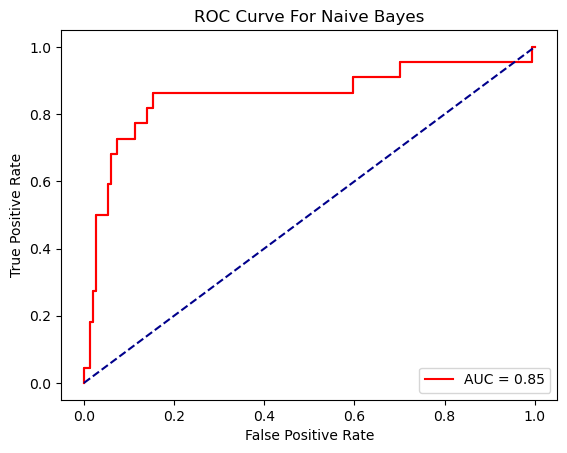

In [ ]:
#acuraccy scores
#Calculating Area Under the Curve with predict probapility:
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, nbModel_s.predict_proba(x_test)[:,1])
roc_auc_3 = roc_auc_score(y_test, nbModel_s.predict_proba(x_test)[:,1])
plt.plot(fpr_3, tpr_3, 'r', label = 'AUC = %0.2f' % roc_auc_3)
plt.plot(fpr_3, tpr_3, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Naive Bayes')
plt.legend(loc = 'lower right')

In [ ]:
# get the values of metrics (precision,recall,f1-score, ROC/AUC)
print("the value of precision is",naive_precision)
print("the value of recall is",naive_recall)
print("the value of f1_score is",naive_score)
print("the value of ROC/AUC is",roc_auc_3)

the value of precision is 0.6875
the value of recall is 0.5
the value of f1_score is 0.5789473684210527
the value of ROC/AUC is 0.8543046357615894


In [ ]:
# get the test accuracy  
naive_accuracy= accuracy_score(y_test,y_predict)
print("the value of accuracy is",naive_accuracy)

the value of accuracy is 0.9075144508670521


In [ ]:
"""
using classification report to show the value of 
(precision,recall,f1-score) of class 0 and class 1
and show the  test accuracy

"""
ClassificationReport3 = classification_report(y_test, y_predict)
print('Classification Report is : \n', ClassificationReport3)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       151
           1       0.69      0.50      0.58        22

    accuracy                           0.91       173
   macro avg       0.81      0.73      0.76       173
weighted avg       0.90      0.91      0.90       173



In [ ]:
# catch the values of recall of class 0 and class 1
ClassificationReport3= classification_report(y_test, y_predict, output_dict=True)
recall_naive = pd.DataFrame(ClassificationReport3).transpose()
naive_recall_class0=recall_naive["recall"][:1,]
naive_recall_class1=recall_naive["recall"][1:2,]

In [ ]:
# catch the values of f-score of class 0 and class 1
ClassificationReport33= classification_report(y_test, y_predict, output_dict=True)
f1_score_naive = pd.DataFrame(ClassificationReport33).transpose()
naive_f1_score_class0=f1_score_naive["f1-score"][0:1,]
naive_f1_score_class1=f1_score_naive["f1-score"][1:2,]

In [ ]:
# the value of recall in class 0
naive_recall_class0

0    0.966887
Name: recall, dtype: float64

In [ ]:
# the value of recall in class 1
naive_recall_class1

1    0.5
Name: recall, dtype: float64

[[146   5]
 [ 11  11]]


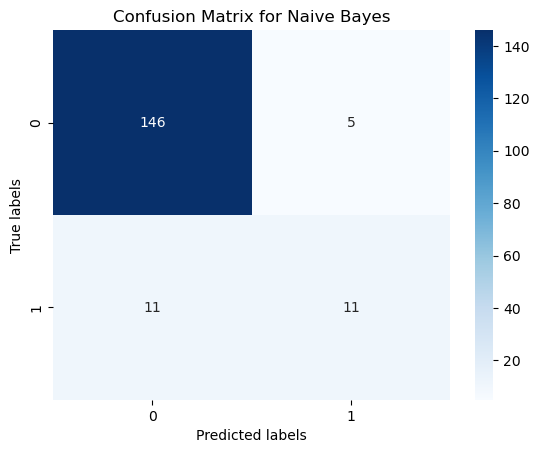

In [ ]:
#compute Confusion Matrix on test data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))
confusion_matrix = confusion_matrix(y_test,y_predict)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax,cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Naive Bayes');

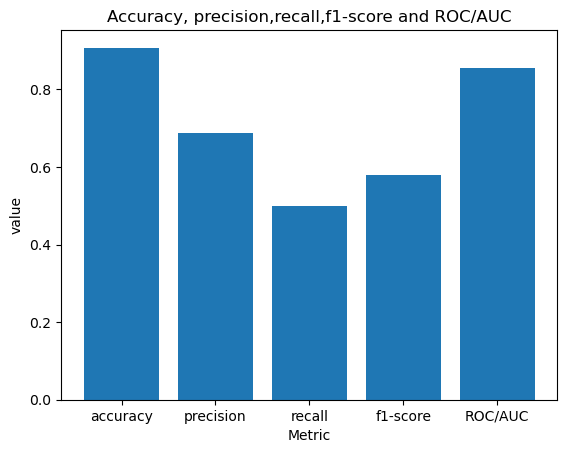

In [ ]:
# plotting the result
plt.bar(["accuracy","precision","recall","f1-score","ROC/AUC"],[naive_accuracy,naive_precision,naive_recall,naive_score,roc_auc_3])
plt.title("Accuracy, precision,recall,f1-score and ROC/AUC")
plt.xlabel("Metric")
plt.ylabel("value")
plt.show()

In [ ]:
# get the detail values of score
pd.DataFrame(nbModel_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002263,0.001783,0.001919,1.129347e-03,1.0,{'var_smoothing': 1.0},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,23
1,0.001410,0.000791,0.000599,4.886947e-04,0.811131,{'var_smoothing': 0.8111308307896871},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,23
2,0.001429,0.002859,0.000201,4.013062e-04,0.657933,{'var_smoothing': 0.657933224657568},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,23
3,0.002825,0.003765,0.004057,2.972376e-03,0.53367,{'var_smoothing': 0.533669923120631},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,23
4,0.003823,0.002770,0.000997,4.422006e-07,0.432876,{'var_smoothing': 0.43287612810830584},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003613,0.003675,0.001604,3.208637e-03,0.0,{'var_smoothing': 2.310129700083158e-09},0.775362,0.521739,0.478261,0.456522,0.456522,0.537681,0.121203,96
96,0.000807,0.000988,0.000000,0.000000e+00,0.0,{'var_smoothing': 1.873817422860387e-09},0.768116,0.471014,0.449275,0.456522,0.442029,0.517391,0.125728,97
97,0.001605,0.003209,0.000000,0.000000e+00,0.0,{'var_smoothing': 1.519911082952933e-09},0.760870,0.449275,0.434783,0.456522,0.434783,0.507246,0.127091,98
98,0.002816,0.002719,0.001605,3.209305e-03,0.0,{'var_smoothing': 1.2328467394420635e-09},0.760870,0.413043,0.413043,0.442029,0.413043,0.488406,0.136694,99


### Decision Tree Model

In [ ]:
# building of grid search  to find the optimal hyperparameters of Decision Tree model
# the hyperparameters that will pass of grid search are (the model,max_depth,,min_samples_leaf,criterion)
parameters = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy", "gini"]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1,n_jobs=-1, cv=5,scoring = "accuracy")
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
#the best value of accuracy in train data 
print(grid_search_cv.best_score_)

0.9521739130434783


In [ ]:
#get the best value of hyperparameters using best_params_
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}


In [ ]:
#get the estimator with best parameter
nbdree_s=grid_search_cv.best_estimator_
nbdree_s

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
"""
1- train the Decision Tree Model using (x_train, y_train)
2- make prediction on x_test data
3- get test accuracy based on the prediction of x_test data y_test
"""
#decision_tree=DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf=5)
nbdree_s.fit(x_train, y_train)
y_pred=nbdree_s.predict(x_test)
print(y_pred)

[0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
# computing the metrics of Decision Tree model(precision,recall,f1-score,ROC/AUC)
dtree_precision=precision_score(y_test,y_pred)
dtree_recall=recall_score(y_test,y_pred)
dtree_score=f1_score(y_test,y_pred)

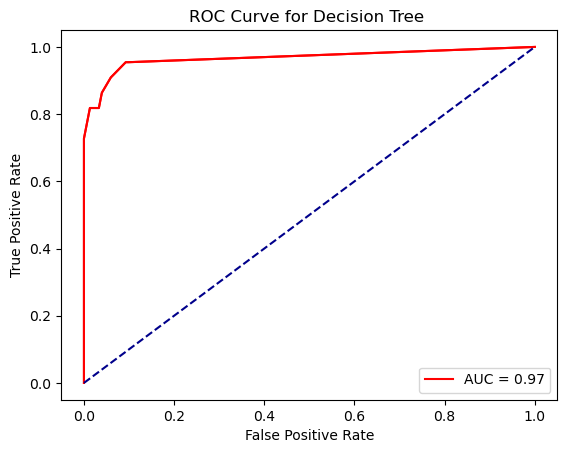

In [ ]:
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, nbdree_s.predict_proba(x_test)[:,1])
roc_auc_4 = roc_auc_score(y_test, nbdree_s.predict_proba(x_test)[:,1])
plt.plot(fpr_4, tpr_4, 'r', label = 'AUC = %0.2f' % roc_auc_4)
plt.plot(fpr_4, tpr_4, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree ')
plt.legend(loc = 'lower right')

In [ ]:
# get the values of metrics (precision,recall,f1-score, ROC/AUC)
print("the value of precision is",dtree_precision)
print("the value of recall is",dtree_recall)
print("the value of f1_score is",dtree_score)
print("the value of ROC/AUC is",roc_auc_4)

the value of precision is 0.6896551724137931
the value of recall is 0.9090909090909091
the value of f1_score is 0.7843137254901961
the value of ROC/AUC is 0.9670379289584587


In [ ]:
# get the test accuracy 
dtree_accuracy= accuracy_score(y_test,y_pred)
print("the value of accuracy is",dtree_accuracy)

the value of accuracy is 0.9364161849710982


In [ ]:
"""
using classification report to show the value of 
(precision,recall,f1-score) of class 0 and class 1
and show the  test accuracy
"""
ClassificationReport2= classification_report(y_test, y_pred)
print('Classification Report is : \n', ClassificationReport2)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       151
           1       0.69      0.91      0.78        22

    accuracy                           0.94       173
   macro avg       0.84      0.92      0.87       173
weighted avg       0.95      0.94      0.94       173



In [ ]:
# catch the values of recall of class 0 and class 1
ClassificationReport2= classification_report(y_test, y_pred, output_dict=True)
recall_dtree = pd.DataFrame(ClassificationReport2).transpose()
dtree_recall_class0=recall_dtree["recall"][:1,]
dtree_recall_class1=recall_dtree["recall"][1:2,]

In [ ]:
# catch the values of f-score of class 0 and class 1
ClassificationReport22= classification_report(y_test, y_pred, output_dict=True)
f1_score_dtree = pd.DataFrame(ClassificationReport22).transpose()
dtree_f1_score_class0=f1_score_dtree["f1-score"][0:1,]
dtree_f1_score_class1=f1_score_dtree ["f1-score"][1:2,]

In [ ]:
# the value of recall in class 0
dtree_recall_class0

0    0.940397
Name: recall, dtype: float64

In [ ]:
# the value of recall in class 1
dtree_recall_class1

1    0.909091
Name: recall, dtype: float64

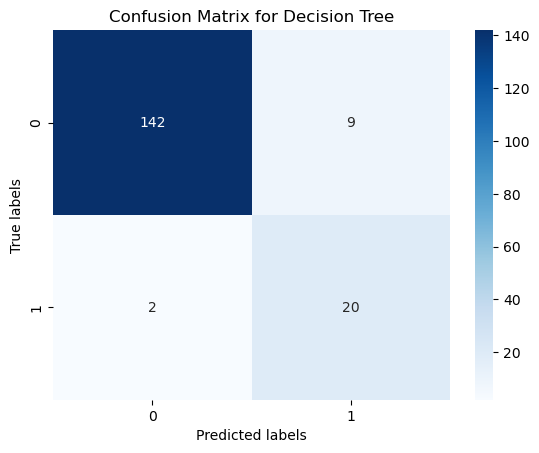

In [ ]:
#compute Confusion Matrix on test data
# drawing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_2= confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(confusion_matrix_2, annot=True, fmt='g', ax = ax,cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Decision Tree');

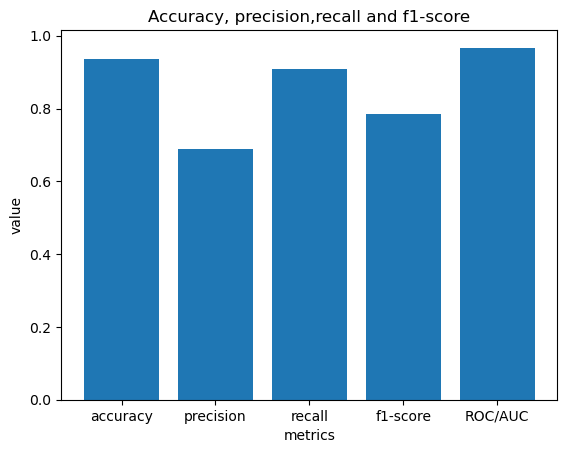

In [ ]:
# plotting the result of Accuracy, precision,recall and f1-score and ROC/AUC on test data 
plt.bar(["accuracy","precision","recall","f1-score","ROC/AUC"],[dtree_accuracy,dtree_precision,dtree_recall,dtree_score,roc_auc_4])
plt.title("Accuracy, precision,recall and f1-score")
plt.xlabel("metrics")
plt.ylabel("value")
plt.show()

In [ ]:
# get the detail values of score
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006249,0.007653,0.000000,0.000000e+00,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.934783,0.949275,0.942029,0.884058,0.905797,0.923188,0.024509,38
1,0.000000,0.000000,0.000000,0.000000e+00,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.942029,0.942029,0.942029,0.876812,0.898551,0.920290,0.027498,39
2,0.006249,0.007653,0.003124,6.248856e-03,entropy,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.942029,0.942029,0.942029,0.876812,0.898551,0.920290,0.027498,39
3,0.000000,0.000000,0.000000,0.000000e+00,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.942029,0.942029,0.963768,0.876812,0.927536,0.930435,0.029202,25
4,0.003124,0.006249,0.003124,6.248665e-03,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.891304,0.869565,0.898551,0.833333,0.913043,0.881159,0.027726,46
5,0.003124,0.006249,0.000000,0.000000e+00,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.956522,0.963768,0.949275,0.920290,0.913043,0.940580,0.020186,8
6,0.000000,0.000000,0.000000,0.000000e+00,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.934783,0.956522,0.949275,0.913043,0.905797,0.931884,0.019765,15
7,0.006249,0.007653,0.000000,0.000000e+00,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.942029,0.942029,0.934783,0.876812,0.927536,0.924638,0.024509,34
8,0.006249,0.007653,0.000000,0.000000e+00,entropy,3,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.942029,0.942029,0.963768,0.876812,0.927536,0.930435,0.029202,25
9,0.002602,0.005204,0.000000,0.000000e+00,entropy,3,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.891304,0.869565,0.898551,0.833333,0.913043,0.881159,0.027726,46


### support vector machine

In [ ]:
# starting with making normalization on data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# building of grid search  to find the optimal hyperparameters of Decision Tree model
# the hyperparameters that will pass of grid search are (Model,C,gamma,kernel,probability)
grid_parameters = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'rbf', 'poly'],'probability':[True,False], "random_state" : [0]}
grid_svm= GridSearchCV(SVC(),grid_parameters,refit=True,n_jobs=-1, cv=9,verbose=1)
grid_svm.fit(x_train,y_train)

Fitting 9 folds for each of 150 candidates, totalling 1350 fits


GridSearchCV(cv=9, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True, False], 'random_state': [0]},
             verbose=1)

In [ ]:
#the best value of accuracy in train data 
print(grid_svm.best_score_)

0.9667160325055062


In [ ]:
#get the best value of hyperparameters using best_params_
print(grid_svm.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 0}


In [ ]:
#get the estimator with best parameter
svm_s=grid_svm.best_estimator_
svm_s

SVC(C=10, gamma=1, kernel='poly', probability=True, random_state=0)

In [ ]:
#make prediction on x_test data
y_pred_svm= svm_s.predict(x_test)

In [ ]:
# computing the metrics of SVM model(precision,recall,f1-score,ROC/AUC) 
svm_precision=precision_score(y_test,y_pred_svm)
svm_recall=recall_score(y_test,y_pred_svm)
svm_score=f1_score(y_test,y_pred_svm)

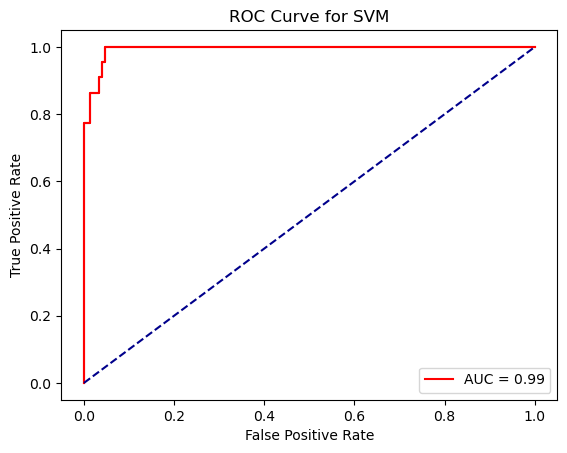

In [ ]:
# plotting of ROC/AUC
fpr_5, tpr_5, thresholds_5= roc_curve(y_test, svm_s.predict_proba(x_test)[:,1])
roc_auc_5 = roc_auc_score(y_test, svm_s.predict_proba(x_test)[:,1])
plt.plot(fpr_5, tpr_5, 'r', label = 'AUC = %0.2f' % roc_auc_5)
plt.plot(fpr_5, tpr_5, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc = 'lower right')

In [ ]:
#get the values of metrics (precision,recall,f1-score, ROC/AUC)
print("the value of precision is",svm_precision)
print("the value of recall is",svm_recall)
print("the value of f1_score is",svm_score)
print("the value of ROC/AUC is",roc_auc_5)

the value of precision is 0.7777777777777778
the value of recall is 0.9545454545454546
the value of f1_score is 0.8571428571428572
the value of ROC/AUC is 0.9933774834437086


In [ ]:
#get the test accuracy 
svm_accuracy= accuracy_score(y_test,y_pred_svm)
print("the value of accuracy is",svm_accuracy)

the value of accuracy is 0.9595375722543352


In [ ]:
"""
using classification report to show the value of 
(precision,recall,f1-score) of class 0 and class 1
and show the  test accuracy
"""
ClassificationReport1 = classification_report(y_test, y_pred_svm)
print('Classification Report is : \n', ClassificationReport1)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       151
           1       0.78      0.95      0.86        22

    accuracy                           0.96       173
   macro avg       0.89      0.96      0.92       173
weighted avg       0.97      0.96      0.96       173



In [ ]:
# catch the values of recall of class 0 and class 1
ClassificationReport1= classification_report(y_test, y_pred_svm, output_dict=True)
recall_svm = pd.DataFrame(ClassificationReport1).transpose()
svm_recall_class0=recall_svm["recall"][:1,]
svm_recall_class1=recall_svm["recall"][1:2,]

In [ ]:
# catch the values of f-score of class 0 and class 1
ClassificationReport11= classification_report(y_test, y_pred_svm, output_dict=True)
f1_score_svm = pd.DataFrame(ClassificationReport11).transpose()
svm_f1_score_class0=f1_score_svm["f1-score"][0:1,]
svm_f1_score_class1=f1_score_svm ["f1-score"][1:2,]

In [ ]:
# the value of recall in class 0
svm_recall_class0

0    0.960265
Name: recall, dtype: float64

In [ ]:
# the value of recall in class 1
svm_recall_class1

1    0.954545
Name: recall, dtype: float64

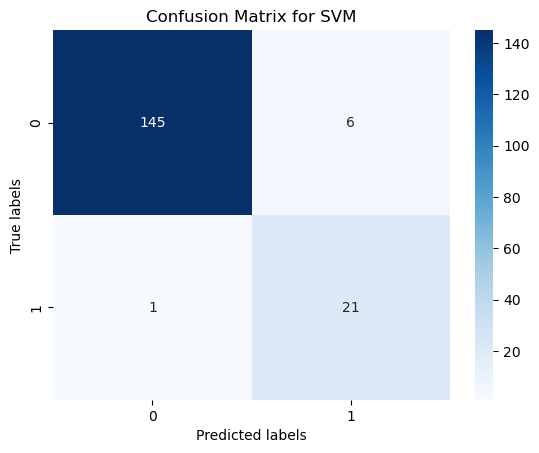

In [ ]:
#compute Confusion Matrix on test data
# drawing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_3= confusion_matrix(y_test,y_pred_svm)
ax= plt.subplot()
sns.heatmap(confusion_matrix_3, annot=True, fmt='g', ax = ax,cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM');

In [ ]:
# get the detail values of score
pd.DataFrame(grid_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,param_random_state,params,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023834,0.002428,0.000776,0.000415,0.1,1,linear,True,0,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",...,0.870130,0.870130,0.870130,0.870130,0.881579,0.881579,0.881579,0.875389,0.005897,83
1,0.004172,0.000722,0.000776,0.000415,0.1,1,linear,False,0,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",...,0.870130,0.870130,0.870130,0.870130,0.881579,0.881579,0.881579,0.875389,0.005897,83
2,0.029572,0.008120,0.001736,0.004910,0.1,1,rbf,True,0,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'proba...",...,0.870130,0.870130,0.870130,0.870130,0.881579,0.881579,0.881579,0.875389,0.005897,83
3,0.003004,0.004884,0.002179,0.004822,0.1,1,rbf,False,0,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'proba...",...,0.870130,0.870130,0.870130,0.870130,0.881579,0.881579,0.881579,0.875389,0.005897,83
4,0.023336,0.004256,0.000224,0.000632,0.1,1,poly,True,0,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly', 'prob...",...,0.961039,0.935065,0.974026,0.948052,0.947368,0.934211,0.973684,0.956501,0.021307,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.030201,0.005373,0.001118,0.002526,1000,0.0001,linear,False,0,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'linear...",...,0.961039,0.935065,0.948052,0.909091,0.921053,0.934211,0.960526,0.937685,0.017123,49
146,0.034351,0.004363,0.000446,0.000835,1000,0.0001,rbf,True,0,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', ...",...,0.870130,0.870130,0.870130,0.883117,0.881579,0.881579,0.881579,0.876832,0.006021,77
147,0.006921,0.004026,0.000890,0.002519,1000,0.0001,rbf,False,0,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', ...",...,0.870130,0.870130,0.870130,0.883117,0.881579,0.881579,0.881579,0.876832,0.006021,77
148,0.015610,0.004210,0.001114,0.002519,1000,0.0001,poly,True,0,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'poly',...",...,0.870130,0.870130,0.870130,0.870130,0.881579,0.881579,0.881579,0.875389,0.005897,83


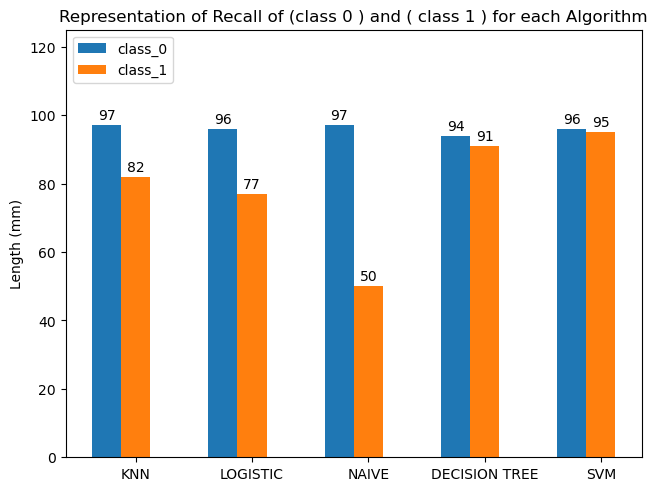

In [ ]:
# represent all values of recall for class 0 and class 1 for all model to predict the best model

species = ("KNN", "LOGISTIC", "NAIVE","DECISION TREE","SVM")
penguin_means = {
    'class_0': (round(knn_recall_class0[0]*100),round(logistic_recall_class0[0]*100),round(naive_recall_class0[0]*100),round(dtree_recall_class0[0]*100),round(svm_recall_class0[0]*100)),
    'class_1': (round(knn_recall_class1[0]*100),round(logistic_recall_class1[0]*100),round(naive_recall_class1[0]*100),round(dtree_recall_class1[0]*100),round(svm_recall_class1[0]*100)),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Representation of Recall of (class 0 ) and ( class 1 ) for each Algorithm')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 125)

plt.show()

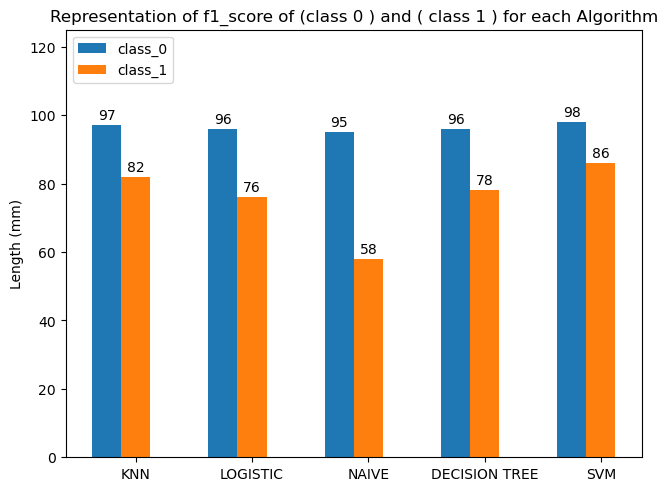

In [ ]:
# represent all values of f1_score for class 0 and class 1 for all model to predict the best model

species = ("KNN", "LOGISTIC", "NAIVE","DECISION TREE","SVM")
penguin_means = {
    'class_0': (round(knn_f1_score_class0[0]*100),round(logistic_f1_score_class0[0]*100),round(naive_f1_score_class0[0]*100),round(dtree_f1_score_class0[0]*100),round(svm_f1_score_class0[0]*100)),
    'class_1': (round(knn_f1_score_class1[0]*100),round(logistic_f1_score_class1[0]*100),round(naive_f1_score_class1[0]*100),round(dtree_f1_score_class1[0]*100),round(svm_f1_score_class1[0]*100)),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Representation of f1_score of (class 0 ) and ( class 1 ) for each Algorithm')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 125)

plt.show()

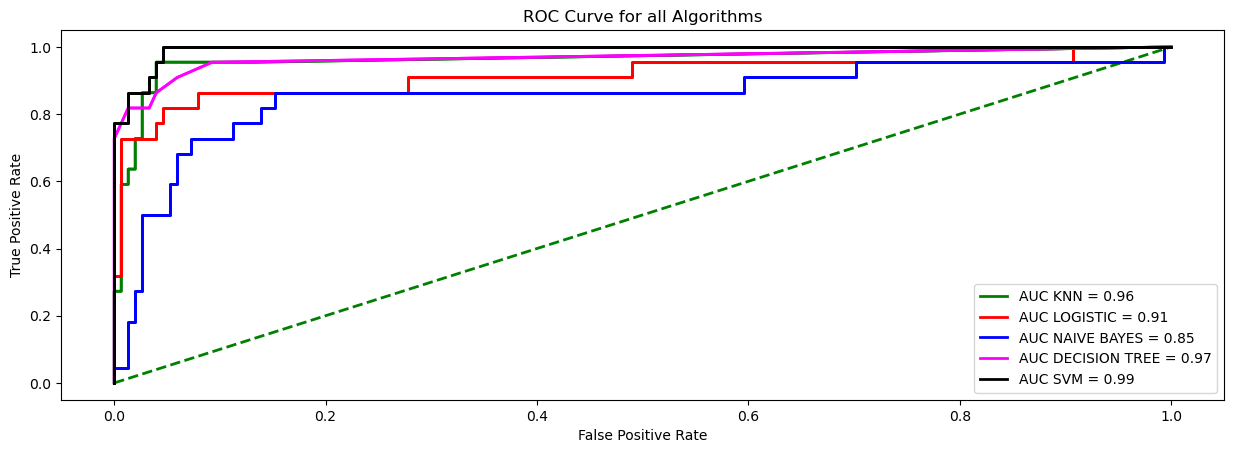

In [ ]:
# plot ROC/AUC for all models
plt.figure().set_figwidth(15)
plt.plot(fpr_1, tpr_1, 'green', label = 'AUC KNN = %0.2f' % roc_auc_1,lw=2)
plt.plot(fpr_1, tpr_1, color='green', label='',lw=2)
plt.plot([0, 1], [0, 1], color='green', linestyle='--',lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')



plt.plot(fpr_2, tpr_2, 'red', label = 'AUC LOGISTIC = %0.2f' % roc_auc_2,lw=2)
plt.plot(fpr_2, tpr_2, color='red', label='',lw=2)
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')


plt.plot(fpr_3, tpr_3, 'blue', label = 'AUC NAIVE BAYES = %0.2f' % roc_auc_3,lw=2)
plt.plot(fpr_3, tpr_3, color='blue', label='',lw=2)
#plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.plot(fpr_4, tpr_4, 'magenta', label = 'AUC DECISION TREE = %0.2f' % roc_auc_4,lw=2)
plt.plot(fpr_4, tpr_4, color='magenta', label='',lw=2)
#plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.plot(fpr_5, tpr_5, 'black', label = 'AUC SVM = %0.2f' % roc_auc_5,lw=2)
plt.plot(fpr_5, tpr_5, color='black', label='',lw=2)
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Algorithms')
plt.legend(loc = 'lower right')
